## Week 2 deliverables
### Aggelos Konioris

#### As first step we import the datasets using pandas library.

In [1]:
import pandas as pd
cab_data = pd.read_csv("Cab_Data.csv")
city = pd.read_csv("City.csv")
customer_id = pd.read_csv("Customer_ID.csv")
transaction_id = pd.read_csv("Transaction_ID.csv")

#### Next, we merge these four datasets into one dataset based on the identical columns.

In [2]:
iso1 = pd.merge(cab_data, city, on = 'City')
iso2 = pd.merge(customer_id, transaction_id, on = 'Customer ID')
df = pd.merge(iso1, iso2, on = 'Transaction ID')

#### In this step we check for missing values. Fortunately there are not exist.

In [3]:
df.isnull().sum()

Transaction ID        0
Date of Travel        0
Company               0
City                  0
KM Travelled          0
Price Charged         0
Cost of Trip          0
Population            0
Users                 0
Customer ID           0
Gender                0
Age                   0
Income (USD/Month)    0
Payment_Mode          0
dtype: int64

#### This step is provided in order to clariy if there are duplicates in the rows of the dataset. As we can see, there are 359392 unique rows, as the number of rows of the dataset.

In [4]:
df['Transaction ID'].nunique()

359392

#### This is the last step of pre-processing the dataset. Firtsly, we change the values of the date of travel variable into datetime. Then, we drop two columns with ID that do not contain any information about our project. Finally, we create three new columns. The Income (USD/Month) Group, the Profit and the Number of Rides. All of them are created in order to help us in our analysis. 

In [5]:
import xlrd
df.drop(['Customer ID', 'Transaction ID'], axis = 1, inplace = True)
iso3 = pd.cut(df['Income (USD/Month)'], bins = [2000, 4000, 16000, 25000, 35000], labels = ['Low','Medium','High','Very High'])
df.insert(11,'Income (USD/Month) Group', iso3)
df['Date of Travel'] = df['Date of Travel'].apply(lambda s: xlrd.xldate.xldate_as_datetime(s, 0))
df['Profit'] = df['Price Charged'] - df['Cost of Trip']
df.insert(14, 'Number of Rides', 1)
df

,Date of Travel,Company,City,KM Travelled,Price Charged,Cost of Trip,Population,Users,Gender,Age,Income (USD/Month),Income (USD/Month) Group,Payment_Mode,Profit,Number of Rides
0,2016-01-08,Pink Cab,ATLANTA GA,30.45,370.95,313.6350,"814,885","24,701",Male,28,10813,Medium,Card,57.3150,1
1,2016-01-06,Pink Cab,ATLANTA GA,28.62,358.52,334.8540,"814,885","24,701",Male,27,9237,Medium,Card,23.6660,1
2,2016-01-02,Pink Cab,ATLANTA GA,9.04,125.20,97.6320,"814,885","24,701",Male,53,11242,Medium,Cash,27.5680,1
3,2016-01-07,Pink Cab,ATLANTA GA,33.17,377.40,351.6020,"814,885","24,701",Male,23,23327,High,Cash,25.7980,1
4,2016-01-03,Pink Cab,ATLANTA GA,8.73,114.62,97.7760,"814,885","24,701",Male,33,8536,Medium,Card,16.8440,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359387,2018-01-08,Yellow Cab,WASHINGTON DC,4.80,69.24,63.3600,"418,859","127,001",Male,24,15651,Medium,Cash,5.8800,1
359388,2018-01-04,Yellow Cab,WASHINGTON DC,8.40,113.75,106.8480,"418,859","127,001",Male,32,6528,Medium,Cash,6.9020,1
359389,2018-01-05,Yellow Cab,WASHINGTON DC,27.75,437.07,349.6500,"418,859","127,001",Male,56,7966,Medium,Cash,87.4200,1
359390,2018-01-05,Yellow Cab,WASHINGTON DC,8.80,146.19,114.0480,"418,859","127,001",Male,32,6423,Medium,Card,32.1420,1


#### In the first step of our analysis we calculate the number of rides from each cab, the total profit and the average profit per one ride.

In [6]:
group1 = df.groupby('Company').sum()[['Profit', 'Number of Rides']].reset_index()
group1['Average Profit per 1 Ride'] = group1['Profit'] / group1['Number of Rides']
group1

,Company,Profit,Number of Rides,Average Profit per 1 Ride
0,Pink Cab,5.307328e+06,84711,62.652174
1,Yellow Cab,4.402037e+07,274681,160.259986


##### As we can see there are significant difference in the number of rides between the two cabs. The Yellow Cab has approximately 140000 rides more. As a result, it has 39 million profit more than the Pink cab. Furthermore, Yellow cab has approximately 98 dollars more profit per one ride than the Pink cab.

#### In the second step we visualize the total profit over the years.

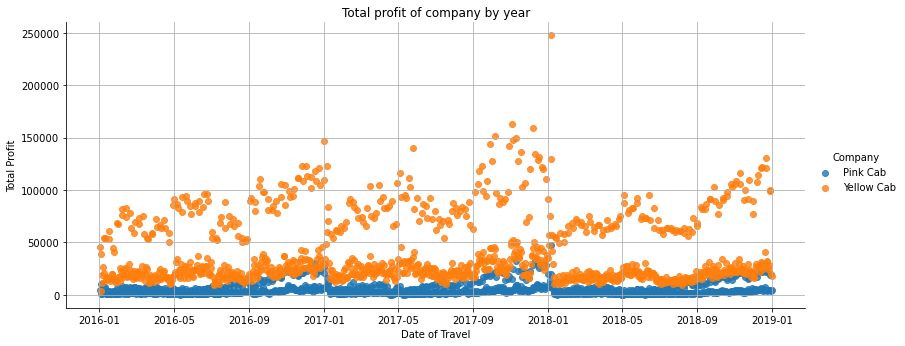

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
group2 = df.groupby(['Date of Travel', 'Company']).sum()['Profit'].reset_index()
sns.lmplot(x = 'Date of Travel', y = 'Profit', height = 4.5, aspect = 2.5, data = group2, fit_reg = False, hue = 'Company')
plt.title('Total profit of company by year')
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

##### Yellow cab has more Profits in each period over the years.

#### We also visualize the same graph but in this case we remove the outlier in the 250000 profit.

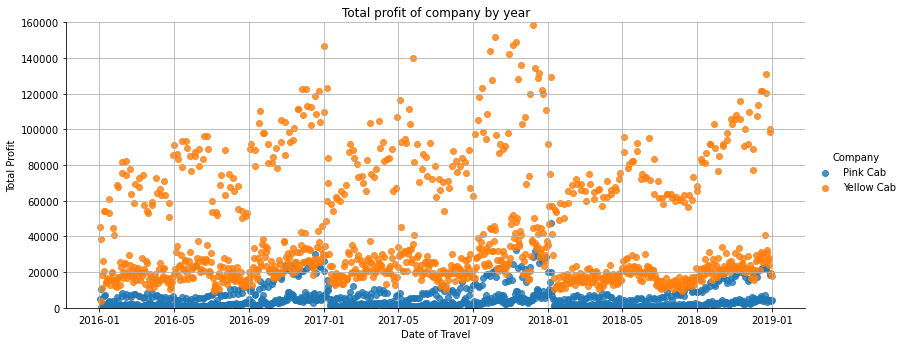

In [8]:
group2 = df.groupby(['Date of Travel', 'Company']).sum()['Profit'].reset_index()
sns.lmplot(x = 'Date of Travel', y = 'Profit', height = 4.5, aspect = 2.5, data = group2, fit_reg = False, hue = 'Company')
plt.title('Total profit of company by year')
plt.ylim([0, 160000])
plt.ylabel('Total Profit')
plt.grid(True)
plt.show()

#### In ordet to have a better understanding of which cab has more profits per 1 ride we visualize the following graph.

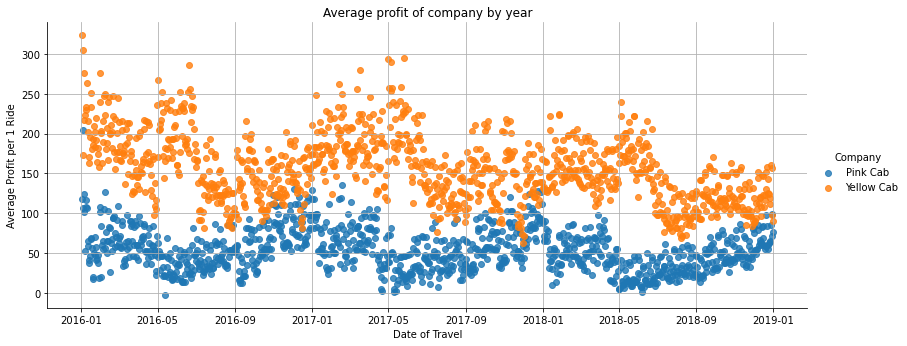

In [9]:
group2 = df.groupby(['Date of Travel','Company']).sum()[['Profit', 'Number of Rides']].reset_index()
group2['Average Profit per 1 Ride'] = group2['Profit'] / group2['Number of Rides']
sns.lmplot(x = 'Date of Travel', y = 'Average Profit per 1 Ride', height = 4.5, aspect = 2.5, data = group2, fit_reg = False, hue = 'Company')
plt.title('Average profit of company by year')
plt.grid(True)
plt.show()

##### Based on the graphs we observe that Yellow cab has more profits at each period over the years. We also observe seasonality, since in the period of September to January there are more profits in both cabs, while in period of May to August there are few profits.

#### In the third step we visualize the total and the average profit based on the age of the customers.

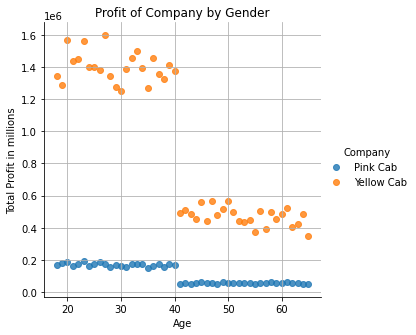

In [10]:
group3 = df.groupby(['Age', 'Company']).sum()['Profit'].reset_index()
sns.lmplot(x = 'Age', y = 'Profit', height = 4.5, data = group3, fit_reg = False, hue = 'Company')
plt.title('Profit of Company by Gender')
plt.ylabel('Total Profit in millions')
plt.grid(True)
plt.show()

##### As we can see there are two zones. The zone of 20-40 and the 40-65. In both zones the total profit of Yellow cab is more.

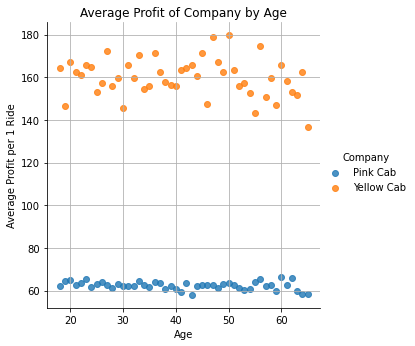

In [11]:
group3 = df.groupby(['Age','Company']).sum()[['Profit', 'Number of Rides']].reset_index()
group3['Average Profit per 1 Ride'] = group3['Profit'] / group3['Number of Rides']
sns.lmplot(x = 'Age', y = 'Average Profit per 1 Ride', height = 4.5, data = group3, fit_reg = False, hue = 'Company')
plt.title('Average Profit of Company by Age')
plt.grid(True)
plt.show()

##### As we expected yellow cab has more profits per 1 ride based on the ages 20-65.

#### The same procedure is utilized in the fourth step. We use the cities instead of age.

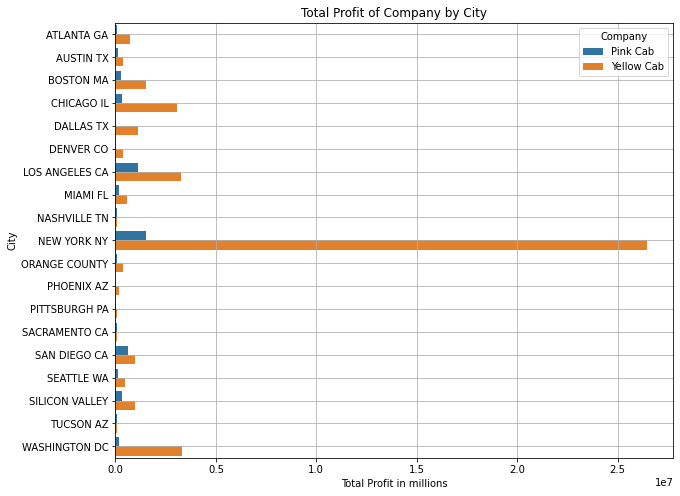

In [12]:
group4 = df.groupby(['City', 'Company']).sum()['Profit'].reset_index()
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(y = 'City', x = 'Profit', ax = ax, data = group4, hue = 'Company')
plt.title('Total Profit of Company by City')
plt.xlabel('Total Profit in millions')
plt.grid(True)
plt.show()

##### The total profit of some cities is seem to be equal for both cabs. For further investigation we perform the average profit per 1 ride. 

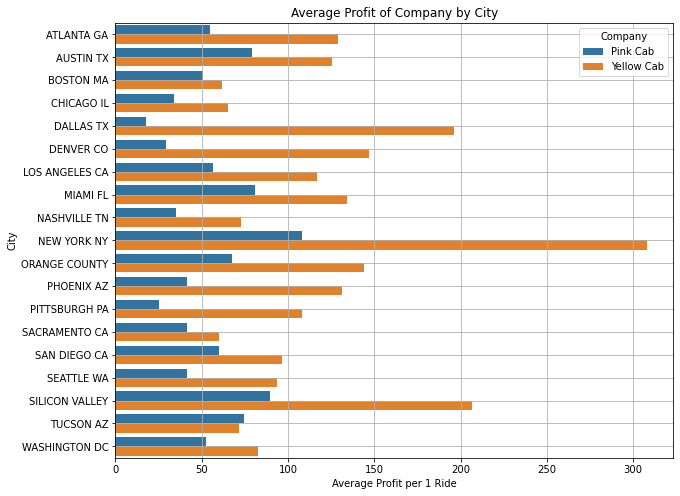

In [13]:
group4 = df.groupby(['City','Company']).sum()[['Profit', 'Number of Rides']].reset_index()
group4['Average Profit per 1 Ride'] = group4['Profit'] / group4['Number of Rides']
fig, ax = plt.subplots(figsize = (10, 8))
sns.barplot(y = 'City', x = 'Average Profit per 1 Ride', ax = ax, data = group4, hue = 'Company')
plt.title('Average Profit of Company by City')
plt.grid(True)
plt.show()

##### Only the city of Tucson Az has more profit per 1 ride in the Pink cab. 

#### In this step we calculate the total profit per 1 KM by each company directly.

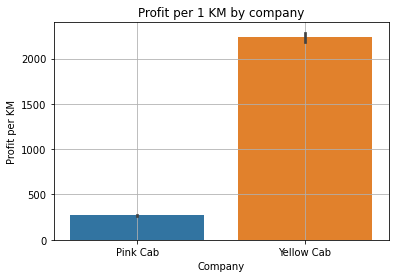

In [14]:
group5 = df.groupby(['KM Travelled', 'Company']).sum()['Profit'].reset_index()
group5['Profit per KM'] = group5['Profit'] / group5['KM Travelled']
sns.barplot(y = 'Profit per KM', x = 'Company', data = group5)
plt.title('Profit per 1 KM by company')
plt.grid(True)
plt.show()

##### There is significant  the two cabs. The Yellow one has more profits again.

#### Finally, in the last step of our analysis we follow the same procedure based on the income group variable that we created.

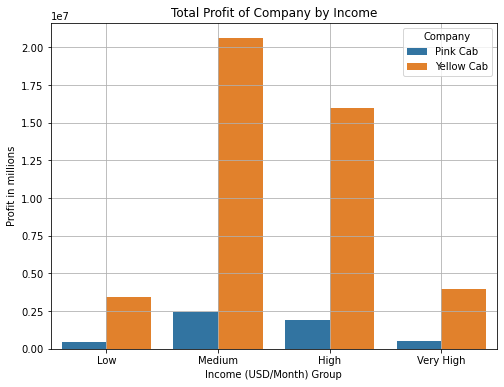

In [15]:
group6 = df.groupby(['Income (USD/Month) Group', 'Company']).sum()['Profit'].reset_index()
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(y = 'Profit', x = 'Income (USD/Month) Group', ax = ax, data = group6, hue = 'Company')
plt.title('Total Profit of Company by Income')
plt.ylabel('Profit in millions')
plt.grid(True)
plt.show()

##### In any case the total profit of Yellow cab is more.

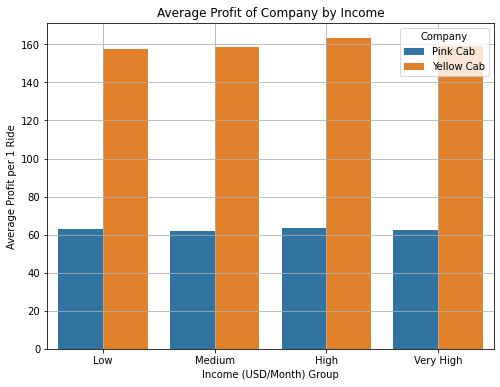

In [16]:
group6 = df.groupby(['Income (USD/Month) Group','Company']).sum()[['Profit', 'Number of Rides']].reset_index()
group6['Average Profit per 1 Ride'] = group6['Profit'] / group6['Number of Rides']
fig, ax = plt.subplots(figsize = (8, 6))
sns.barplot(y = 'Average Profit per 1 Ride', x = 'Income (USD/Month) Group', ax = ax, data = group6, hue = 'Company')
plt.title('Average Profit of Company by Income')
plt.grid(True)
plt.show()

##### In the average profit per 1 ride there are no differences among the groups of income, but all of them have significant difference between the two cabs. The Yellow one has more profits per 1 ride.

### In conclusion we made the following assumptions.
### 1) Total profit for each cab
### 2) Years profit analysis
### 3) Seasonality
### 4) Profit analysis based on age
### 5) Profit analysis based on city
### 6) KM travelled profit analysis
### 7) Profit analysis based on income

## The whole analysis showed us that Yellow cab has by far more profits and demand than the Pink cab. Thus, we recommend the Yellow cab for investment. 